## SHOPIFY DATA ANALYSIS

### Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one
model of shoe. We want to do some analysis of the average order value (AOV). When
we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13.
Given that we know these shops are selling sneakers, a relatively affordable item,
something seems wrong with our analysis.

a. Think about what could be going wrong with our calculation. Think about a better
way to evaluate this data.

b. What metric would you report for this dataset?

c. What is its value?


In [98]:
# The required libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
# The dataset is loaded into the notebook
df = pd.read_csv('2019_Winter_Data_Science _Intern_Challenge _Data _Set_Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [100]:
# an info command is carried out to ensure there are no missing values in the dataset and to view the various data types
print(df.shape)
df.info()

(5000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [101]:
# The "created_at" column is changed to a datetime datatype and the order_id is set to the index to eliminate repetitive numbering 
df['created_at'] = pd.to_datetime(df['created_at'])
df1 = df.set_index("order_id", drop=True, append=False, inplace=False, verify_integrity=False)
df1.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 04:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [102]:
# confirming the datetime change
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   shop_id         5000 non-null   int64         
 1   user_id         5000 non-null   int64         
 2   order_amount    5000 non-null   int64         
 3   total_items     5000 non-null   int64         
 4   payment_method  5000 non-null   object        
 5   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 273.4+ KB


In [103]:
# sorting the dataset so it follows the time of creation
df1 = df1.sort_values(by="created_at")
df1.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1863,39,738,536,4,cash,2017-03-01 00:08:09
1742,39,910,268,2,cash,2017-03-01 00:10:19
3229,97,912,324,2,cash,2017-03-01 00:14:12
1268,80,798,290,2,credit_card,2017-03-01 00:19:31
2690,49,799,258,2,credit_card,2017-03-01 00:22:25


In [104]:
# This indicates that there are exactly 100 shops as mentioned, and there are no repeating order_id, 
# Also checks that there are only 30 days worth of data
print(len(df1.shop_id.unique()))
print(len(df1.index.unique()))
print(len(df1['created_at'].dt.day.unique()))

100
5000
30


In [105]:
# This shows the statistical summary of the dataset 
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
shop_id,5000.0,50.0788,29.006118,1.0,24.0,50.0,75.0,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.0,849.0,925.0,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.0,284.0,390.0,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.0,2.0,3.0,2000.0


From the statistical summary it can be seen that there are outliers present in the dataset for "order_amounts" and "total_items" due to the high standard deviation and maximum value for both, which require futher investigation.

In [106]:
# Checks for presence of outliers(p>3)
df1.kurtosis(numeric_only= True)

shop_id          -1.219793
user_id          -1.090711
order_amount    279.901514
total_items     289.369953
dtype: float64

As was expected both columns (i.e 'order_amount' and 'total_items') have pvalues far greater than the expected outcome. 

### Graphical Visualization of the dataset

<AxesSubplot:>

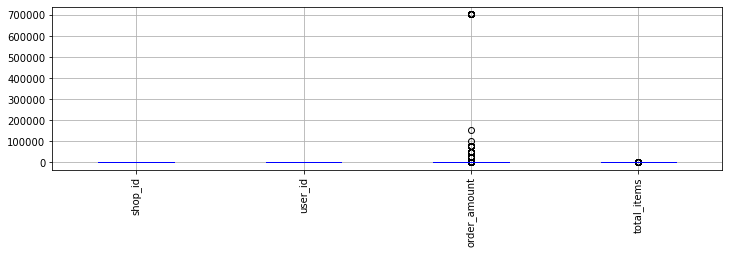

In [107]:
df1.boxplot(rot='90', color="blue",figsize=(12, 3))

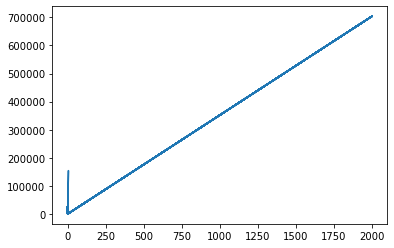

In [108]:
plt.plot(df1["total_items"],df1["order_amount"])

From the boxplot and the line graph the investigation shows a relationship between the high values in both columns which can be futher investigated with a more precise visualization plot.

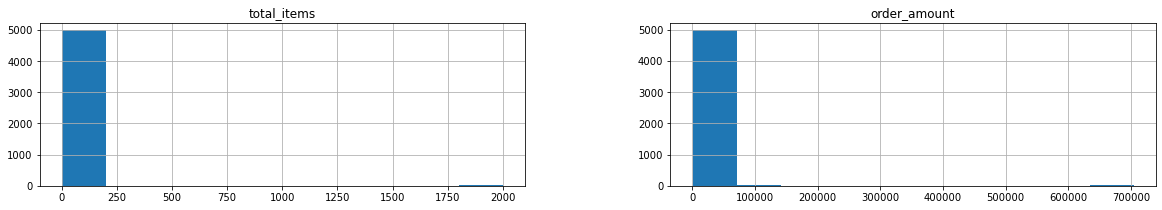

In [109]:
features = ['total_items', 'order_amount'] # create a list of all numerical features
df[features].hist(figsize=(20,3));

From the plot shown above there is a high level of certainty that the outragous amount was due to a high order which makes perfect sense but looking critically at the plot for both column we see a slight protrusion for the high values indicating multiple entry. Thus we can view in the table to ascertain our observations.

In [110]:
# Creates a dataframe to count the number of occurrences of the order_amounts column
order_amounts = df.groupby(['order_amount']).size().reset_index(name='count').sort_values(by='order_amount', ascending=False)
order_amounts.head(10)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


From the table above we see that some entries have larger counts than normal which may be due to multiple entries for a single order. 

In [111]:
# Creates a dataframe to count the number of occurrences of the total_items column
total_items = df.groupby(['total_items']).size().reset_index(name='count').sort_values(by='total_items', ascending=False)
total_items.head(10)

,total_items,count
7,2000,17
6,8,1
5,6,9
4,5,77
3,4,293
2,3,941
1,2,1832
0,1,1830


The table above solidifies our claim of the obvious relationship between the two aforementioned columns. 

#### ORDERED BY DATE

In [124]:
# Classifies the dataset with the maximum counts observed  earlier and sorts by the date of entry.
df2 = df1.loc[df1['order_amount'].isin([704000, 77175, 51450, 25725])].sort_values(by='created_at', ascending=False)
df2.head(50)

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1420,78,912,25725,1,cash,2017-03-30 12:23:43
1530,78,810,51450,2,cash,2017-03-29 07:12:01
2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00
2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00
2453,78,709,51450,2,cash,2017-03-27 11:04:04
1260,78,775,77175,3,credit_card,2017-03-27 09:27:20
491,78,936,51450,2,debit,2017-03-26 17:08:19
2774,78,890,25725,1,cash,2017-03-26 10:36:43


#### Ordered by amount

In [127]:
# Classifies the dataset with the maximum counts observed  earlier and sorts by the order_amount.
df2 = df1.loc[df1['order_amount'].isin([704000,154350,102900, 77175, 51450, 25725])].sort_values(by='order_amount', ascending=False)
df2.head(50)

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00
4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00
4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00
2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00


#### Ordered by user_id

In [126]:
# Classifies the dataset with the maximum counts observed  earlier and sorts by the user_id.
df2 = df1.loc[df1['order_amount'].isin([704000, 77175, 51450, 25725])].sort_values(by='user_id', ascending=True)
df2.head(60)

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
4883,42,607,704000,2000,credit_card,2017-03-25 04:00:00
1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
4869,42,607,704000,2000,credit_card,2017-03-22 04:00:00
1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00
2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00
4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00


### Analysis summary
1.) From the Large tables above each ordered by a different feature to give an indepth view of the problem at hand, as can be seen in the first table ordered by date we can tell multiple entries in a single day by the same user, the same total_items, the same amount and the same shop_id.

2.) From the second table classified by order_amount we can see some shop_ids that sell sneakers at a very huge amount, this may be due to incorrect inputs.

3.) From the third table ordered by the user_id the value "607" occurs multiple times indicating multiple entries. So it would be advisable to drop rows with that user_id to get an accurate AOV.

#### Metric of choice
The metric that should be reported for this dataset should be either the ***median value or the modal value*** since both metrics are only slightly affected by the erroneous entries in the dataset.

#### Value of Metric

In [131]:
Median = df1["order_amount"].median()
print("Median value: ", Median)

Median value:  284.0


In [133]:
Mode = df1["order_amount"].mode()
print("Modal value: ", Mode[0])

Modal value:  153


As seen both metrics show the affordability of the sneakers.